In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastbook
    
# ignore warnings. warnings will disappear if you run this cell a second time

# CNN for Diabetic Retinopathy Classification

Diabetic Retinopathy (DR) is a complication of diabetes that damages blood vessel networks in the retina. Diagnosis by color fundus images involves skilled clinicians to recognize the presence of lesions in the image that can be used to detect the disease properly, making it a time-consuming process.

Here I create a convolutional neural network (CNN) to classify retinal fundus images as No DR, Mild Non-Proliferative DR, Moderate Non-Proliferative DR, Severe Non-Proliferative DR, and Proliferative DR. 

I use the [Messiador](https://www.adcis.net/en/third-party/messidor/) dataset, which consists of 1,200 labeld retinal fundus images. Here I am fine-tuning *resnet-50* for the classification

In [2]:
from fastbook import *
from PIL import Image as PImage

path = "/kaggle/input/diabeticretinopathy-messidor-eyepac-preprocessed/Messidor-2+EyePac_Balanced/"
list_folders =os.listdir(path)

This is what the images look like

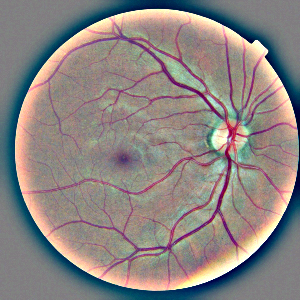

In [10]:
imgpath = path+'0/'
imageList = os.listdir(imgpath)
PImage.open(imgpath + imageList[0])

In [5]:
import fastbook as fb
dir(fb)

['APScoreBinary',
 'APScoreMulti',
 'AccumMetric',
 'ActivationStats',
 'Adam',
 'AdaptiveAvgPool',
 'AdaptiveConcatPool1d',
 'AdaptiveConcatPool2d',
 'AddMaskCodes',
 'AffineCoordTfm',
 'Any',
 'ArrayBase',
 'ArrayImage',
 'ArrayImageBW',
 'ArrayImageBase',
 'ArrayMask',
 'AttrDict',
 'AttrGetter',
 'AutoInit',
 'AvgLoss',
 'AvgMetric',
 'AvgPool',
 'AvgSmoothLoss',
 'BBoxBlock',
 'BBoxLabeler',
 'BBoxLblBlock',
 'BCELossFlat',
 'BCEWithLogitsLossFlat',
 'BILINEAR',
 'BalancedAccuracy',
 'BaseLoss',
 'BatchNorm',
 'BatchNorm1dFlat',
 'BatchSampler',
 'BnFreeze',
 'BrierScore',
 'BrierScoreMulti',
 'Brightness',
 'BuiltinFunctionType',
 'BuiltinMethodType',
 'BypassNewMeta',
 'ByteTensor',
 'BytesIO',
 'CSVLogger',
 'Callable',
 'Callback',
 'CancelBackwardException',
 'CancelBatchException',
 'CancelEpochException',
 'CancelFitException',
 'CancelStepException',
 'CancelTrainException',
 'CancelValidException',
 'CastToTensor',
 'Cat',
 'CategoricalDtype',
 'Categorize',
 'Category',


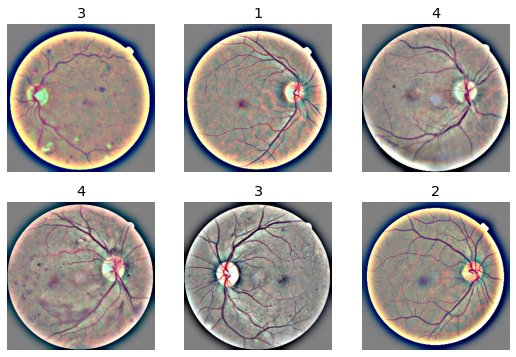

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(300, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.842314,1.576850,0.469444,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.965847,1.038543,0.422222,00:21
1,0.645128,1.246049,0.369444,00:20
2,0.592392,1.349484,0.352778,00:20
3,0.540373,1.317308,0.369444,00:20
4,0.333916,1.178630,0.322222,00:21
5,0.192849,1.294145,0.305556,00:20
6,0.114521,1.206766,0.325000,00:21
7,0.059992,1.242738,0.291667,00:21
8,0.035019,1.232279,0.297222,00:21
9,0.019270,1.238503,0.313889,00:21


In [13]:
help(learn.predict)

Help on method predict in module fastai.learner:

predict(item, rm_type_tfms=None, with_input=False) method of fastai.learner.Learner instance
    Prediction on `item`, fully decoded, loss function decoded and probabilities



In [20]:
dir(DataBlock)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_combine_type_tfms',
 '_docs',
 '_methods',
 '_msg',
 'blocks',
 'dataloaders',
 'datasets',
 'dl_type',
 'from_columns',
 'get_items',
 'get_x',
 'get_y',
 'new',
 'splitter',
 'summary',
 'weighted_dataloaders']

In [15]:
help(DataBlock)

Help on class DataBlock in module fastai.data.block:

class DataBlock(builtins.object)
 |  DataBlock(blocks: 'list' = None, dl_type: 'TfmdDL' = None, getters: 'list' = None, n_inp: 'int' = None, item_tfms: 'list' = None, batch_tfms: 'list' = None, *, get_items=None, splitter=None, get_y=None, get_x=None)
 |  
 |  Generic container to quickly build `Datasets` and `DataLoaders`.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, blocks: 'list' = None, dl_type: 'TfmdDL' = None, getters: 'list' = None, n_inp: 'int' = None, item_tfms: 'list' = None, batch_tfms: 'list' = None, *, get_items=None, splitter=None, get_y=None, get_x=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  dataloaders(self, source, path: 'str' = '.', verbose: 'bool' = False, *, bs: 'int' = 64, shuffle: 'bool' = False, num_workers: 'int' = None, do_setup: 'bool' = True, pin_memory=False, timeout=0, batch_size=None, drop_last=False, indexed=None, n=None, device=None, persistent_worke

In [17]:
x_path = '/kaggle/input/diabeticretinopathy-messidor-eyepac-preprocessed/Messidor-2+EyePac_Balanced/3/1008_right.jpeg'

In [30]:
from fastai.vision.all import *
import tempfile

In [40]:
img = PILImage.create('/kaggle/input/diabeticretinopathy-messidor-eyepac-preprocessed/Messidor-2+EyePac_Balanced/4/10017_right.jpeg')  # Update with the path to the image file
img = img.resize((300, 300))

with tempfile.TemporaryDirectory() as temp_dir:
    # Save the image as a file in the temporary directory
    img_path = Path(temp_dir) / 'temp_img.jpg'
    img.save(img_path)

    # Create a minimal DataLoader object
    dl = l.dls.test_dl([str(img_path)], num_workers=0)

    prediction, *_ = l.get_preds(dl=dl, with_input=False)

# Extract the predicted class and probabilities
predicted_class = l.dls.vocab[prediction.argmax(dim=1).item()]
probabilities = prediction.squeeze().tolist()

# Display the predicted class and probabilities
print("Predicted Class:", predicted_class)

Predicted Class: 4


In [37]:
learn.export('model.pkl')

In [38]:
l = load_learner('/kaggle/working/model.pkl')

In [39]:
help(learn.export)

Help on method export in module fastai.learner:

export(fname='export.pkl', pickle_module=<module 'pickle' from '/opt/conda/lib/python3.7/pickle.py'>, pickle_protocol=2) method of fastai.learner.Learner instance
    Export the content of `self` without the items and the optimizer state for inference



## Evaluation

Plotting the confusion matrix, we can see the classifier struggles the most with classifications 0-2, and performs significantly better with classes 3 and 4.

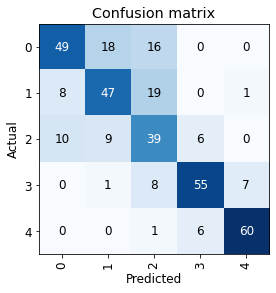

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

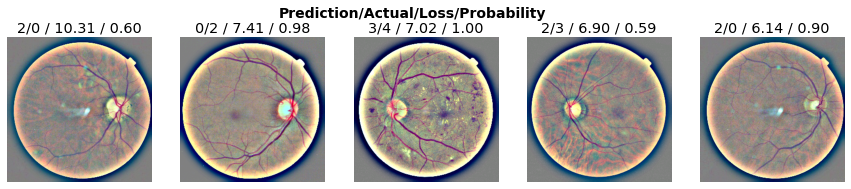

In [8]:
interp.plot_top_losses(5,nrows=1)